59793


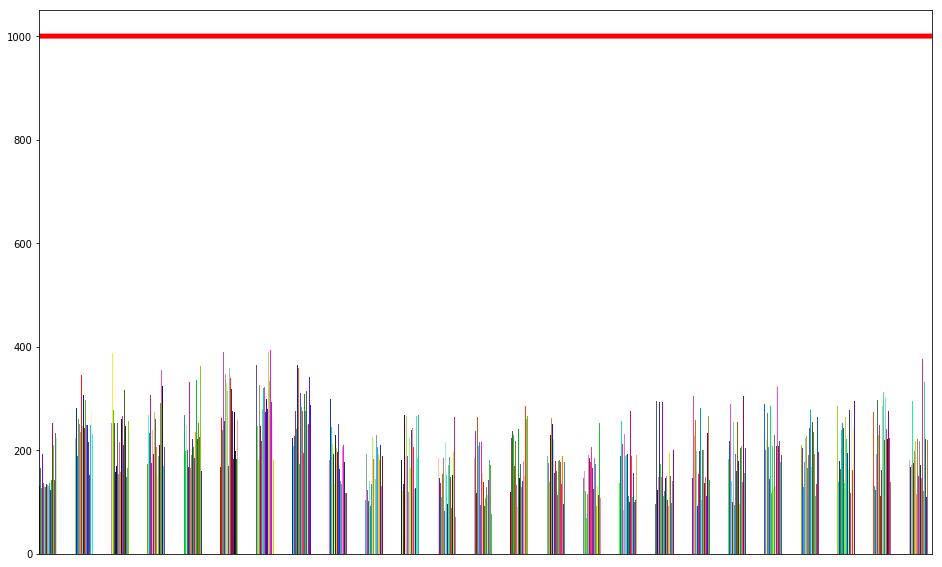

In [24]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import cm
from datetime import datetime
from datetime import timedelta
import random


import os
'''print os.listdir("C:\\temp\\")'''

xcoords = []
with open('C:\\temp\\QuikFix.log.d', 'r') as f:   
    
    while f.readline():
        l=f.readline()
        if l.find("35=8")>0:
            localtime=l[10:22]
            p=l.find("60=",0)
            fixtime=l[p+12:p+24]
            
            #print localtime, fixtime
            FMT = '%H:%M:%S.%f'
            
            
            tdelta = datetime.strptime(localtime, FMT) - datetime.strptime(fixtime, FMT)
            #print 'tdelta = ', tdelta
            hd = timedelta(hours=3)
            td = tdelta - hd  
            #print '- 3 hours = ', td
            if str(td) != '0:00:00':
                a = datetime.strptime(str(td), '%H:%M:%S.%f')
                s = a.strftime('%H:%M:%S.%f')
                b = s[-6:-3]
                xcoords.append(int(b))
                
#print xcoords
print len(xcoords)
#print xcoords[0:1001]
number_of_colors = 59793

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# for xc,c in zip(xcoords[0:5],colors):
#     plt.axhline(y=xc, c=c, linestyle='-')

# plt.show()
#color = cm.inferno_r(np.linspace(.4,.8, 30))
#print type(color)
x = xcoords
#print x
plot = pd.DataFrame(x).plot(kind='bar', color=[colors], label=None, legend=None, figsize=(16,10)).axhline(y=1000, color='red', linewidth=5, snap=False)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)   
      

71167
71167


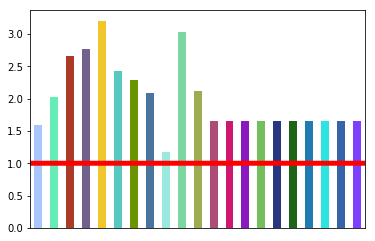

In [17]:
import pandas as pd
from IPython.display import display, HTML
import webbrowser
from datetime import datetime, timedelta
import numpy as np
import random
import matplotlib.pyplot as plt

listOfLTime = []
listOfFTime = []

with open('C:\\temp\\QuikFix.log', 'r') as f:
    #i = 0
    while f.readline():
        #if i < 2:
            line = f.readline()
            if line.find("35=8")>0:
                #line = line.replace('\x01', r' , ')
                localTime = line[10:22]
                localTime = datetime.strptime(localTime, '%H:%M:%S.%f')
                listOfLTime.append(localTime)
                p = line.find("60=",0)
                fixtime = line[p+12:p+24]
                fixtime = datetime.strptime(fixtime, '%H:%M:%S.%f')
                listOfFTime.append(fixtime)
                #i = i +1
            #else:
                #break
        
print len(listOfLTime)
print len(listOfFTime)
# l = listOfLTime[0:11]
# fixt = listOfFTime[0:11]

l = listOfLTime
fixt = listOfFTime

df = pd.DataFrame({'LocalTime': l, 'Fix 60 tag time': fixt})
df = df.reindex(columns=['LocalTime','Fix 60 tag time'])
# df['LocalTime'] = pd.to_datetime(df['LocalTime'], format="%H:%M:%S.%f").apply(lambda x: x.time())
# df['Fix 60 tag time'] = pd.to_datetime(df['Fix 60 tag time'], format="%H:%M:%S.%f").apply(lambda x: x.time())
offset = timedelta(hours=3)
df['LocalTime'] = df['LocalTime'] - offset

df['diff_seconds'] = df['LocalTime'] - df['Fix 60 tag time']
df['diff_seconds'] = df['diff_seconds']/np.timedelta64(1,'s')

#display(HTML(df.to_html()))
rslt_df = df[df['diff_seconds'] > 1.000] 
rslt_df.to_html("frame.html")
url = "http://localhost:8888/view/frame.html"
webbrowser.open(url,new=2)


# df['diff_seconds'].to_html("frame.html")
# url = "http://localhost:8888/view/frame.html"
# webbrowser.open(url,new=2)

number_of_colors = 100

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

x = rslt_df['diff_seconds'] 
plot = pd.DataFrame(x).plot(kind='bar', color=[colors], label=None, legend=None).axhline(y=1.0, color='red', linewidth=5, snap=False)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)